## imports

In [176]:
# Pipelines imports
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,roc_curve


In [177]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [178]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1.5, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc="lower right", fontsize=16)


In [179]:


data_path = os.path.join(os.path.curdir, 'data')
print(os.getcwd())
# loadit les csv
general_data_brute = pd.read_csv(os.path.join(data_path, 'general_data.csv'))
in_time_brute = pd.read_csv(os.path.join(data_path, 'in_time.csv'))
out_time_brute = pd.read_csv(os.path.join(data_path, 'out_time.csv'))
manager_survey_data_brute = pd.read_csv(
    os.path.join(data_path, 'manager_survey_data.csv'))
employee_survey_data_brute = pd.read_csv(
    os.path.join(data_path, 'employee_survey_data.csv'))


c:\Users\Nazim\Documents\Dev\HumanForYou


In [180]:
pd.set_option('display.max_columns', None)


## Data Info

In [181]:
general_data_brute.head()  # affichit head tae csv


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [182]:
general_data_brute.describe()  # descriptit general data


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [183]:
general_data_brute.info()  # affichit les infos ta3 chaque collone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

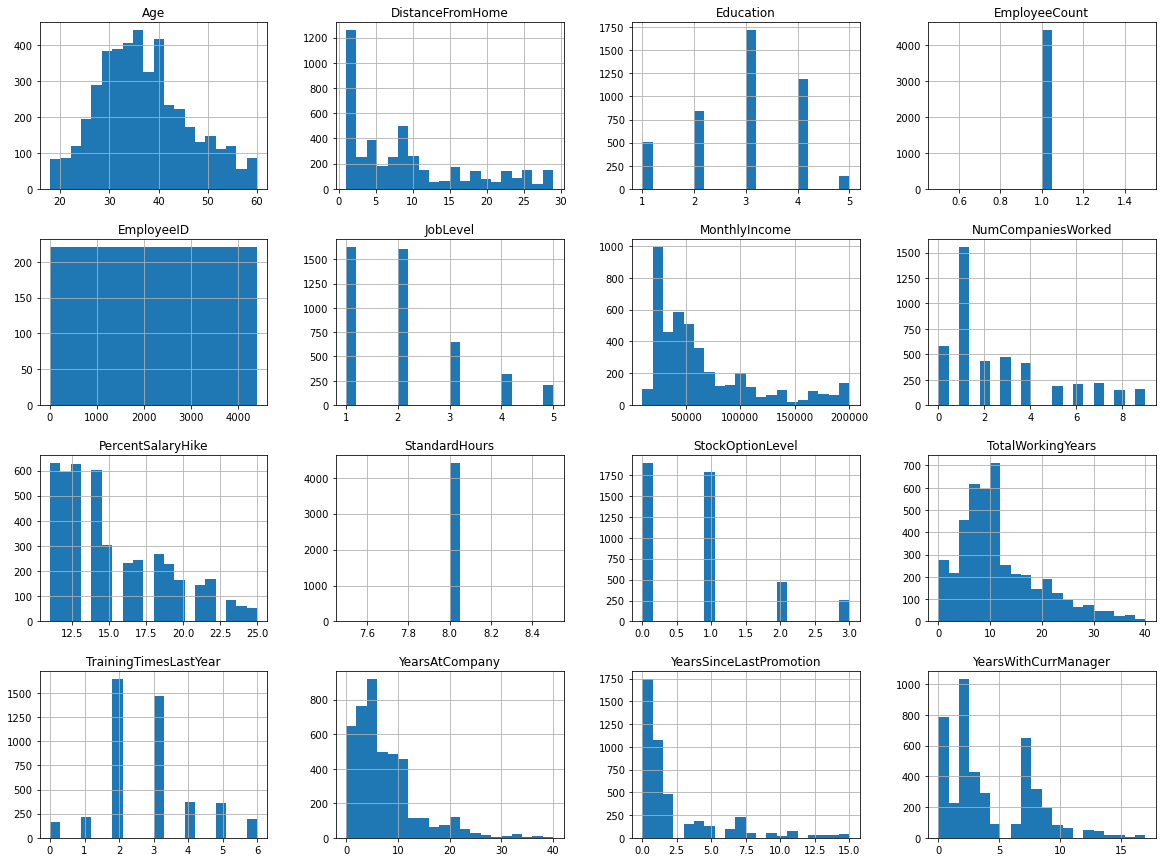

In [184]:
general_data_brute.hist(bins=20, figsize=(20, 15))
plt.show()

# affichit histogramme tae dataset general


In [185]:
manager_survey_data_brute.head()


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [186]:
manager_survey_data_brute.describe()


,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


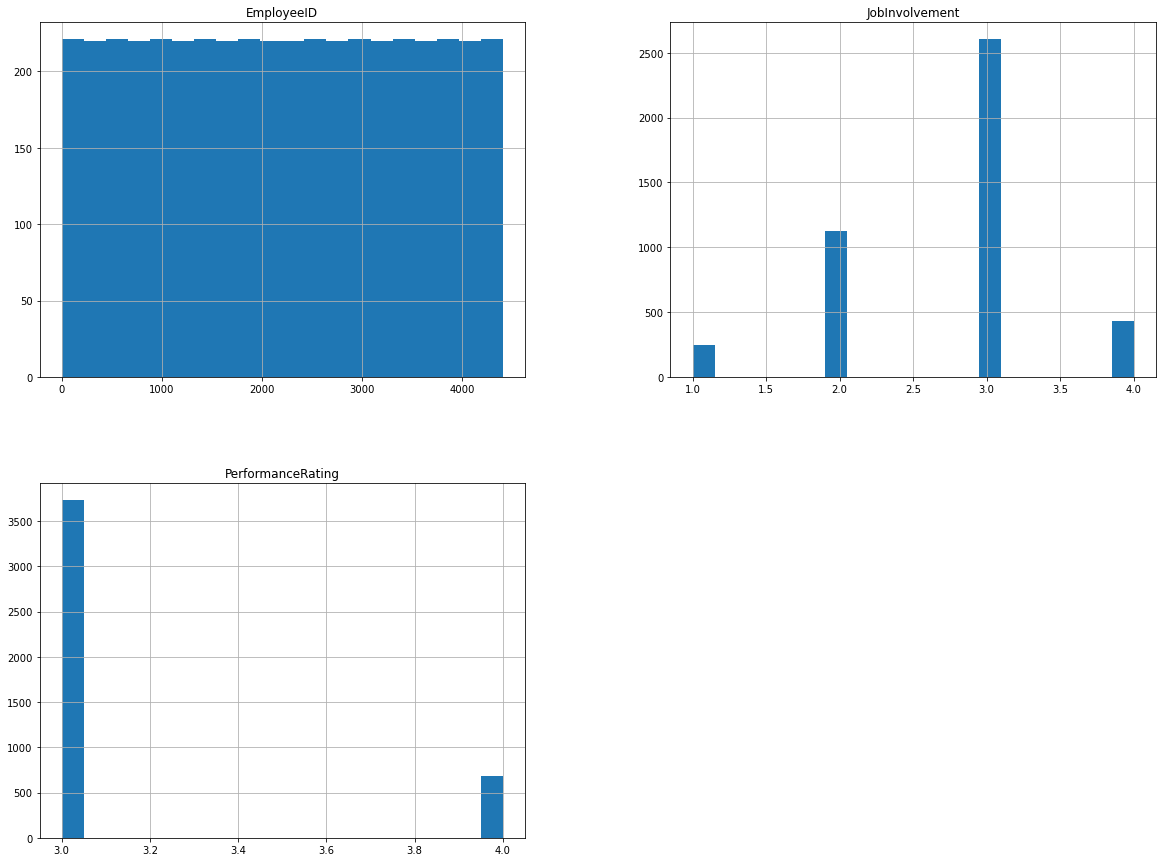

In [187]:
manager_survey_data_brute.hist(bins=20, figsize=(20, 15))
plt.show()


In [188]:
employee_survey_data_brute.head()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [189]:
employee_survey_data_brute.describe()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


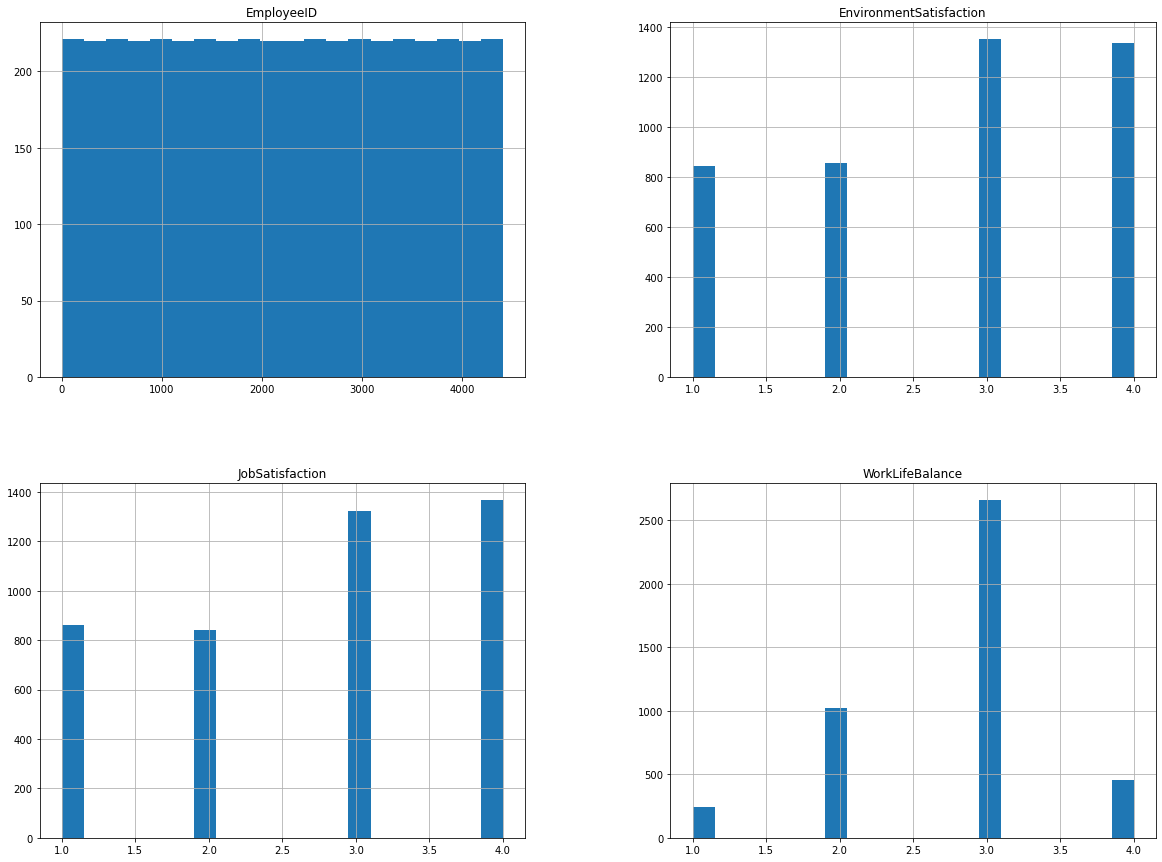

In [190]:
employee_survey_data_brute.hist(bins=20, figsize=(20, 15))
plt.show()


## Pre-traitement

In [191]:
general_data = general_data_brute.drop('Over18', axis=1)
general_data = general_data.drop('StandardHours', axis=1)
general_data = general_data.drop('EmployeeCount', axis=1)


# deletit zoudj les collone


In [192]:
general_data.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [193]:
in_time_brute.head()


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [194]:
out_time = out_time_brute.copy()
out_time['employee_id'] = out_time[out_time.columns[0]]
out_time = out_time.drop(out_time.columns[0], axis=1)
# segemt la collone li ma 3ndhach asem


In [195]:
in_time = in_time_brute.copy()
in_time['employee_id'] = in_time[in_time.columns[0]]
in_time = in_time.drop(in_time.columns[0], axis=1)

# segemt la collone li ma 3ndhach asem


In [196]:
free_days = []
for col in in_time.columns:
    if in_time[col].isna().all():
        in_time = in_time.drop(col, axis=1)
        out_time = out_time.drop(col, axis=1)

# nehit les jours ferié


In [197]:
out_time.head()


,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,employee_id
0,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2015-03-30 17:33:09,2015-03-31 18:00:07,2015-04-01 17:32:50,2015-04-02 17:24:58,2015-04-03 17:11:46,2015-04-06 16:42:46,2015-04-07 17:55:07,2015-04-08

In [198]:
# count work hours for each employee
from datetime import datetime, timedelta
employees_hours = []
additional_hours = []
minus_hours = []
abscences = []
for index, row in general_data.iterrows():
    employee_id = row['EmployeeID']
    in_time_employee = in_time[in_time['employee_id']
                               == employee_id].values[0]
    out_time_employee = out_time[out_time['employee_id']
                                 == employee_id].values[0]
    out_time_employee = out_time_employee[:-1]
    in_time_employee = in_time_employee[:-1]
    abscence = np.count_nonzero(in_time_employee == 'NaN')
    abscences.append(abscence)
    now = datetime.now()
    in_time_employee = np.array([datetime.strptime(
        x, '%Y-%m-%d %H:%M:%S') if not pd.isna(x) else now for x in in_time_employee])
    out_time_employee = np.array([datetime.strptime(
        x, '%Y-%m-%d %H:%M:%S') if not pd.isna(x) else now for x in out_time_employee])

    employee_hours = out_time_employee - in_time_employee
    employee_hours = [x.total_seconds() for x in employee_hours]
    employee_hours = sum(employee_hours)
    employees_hours.append(employee_hours/(60**2))
    nb_day = len(out_time_employee)
    additional_hour = ((8*(nb_day))-employee_hours/(60**2))
    if additional_hour < 0:
        additional_hour = 0
        minus_hour = -1 * additional_hour
    else:
        minus_hour = 0

    additional_hours.append(additional_hour)
    minus_hours.append(minus_hour)
general_data['worked_hour'] = employees_hours
general_data['additional_hour'] = additional_hours


In [199]:
np.count_nonzero(abscences)


0

In [200]:
general_data['worked_hour']


0       1710.686944
1       1821.676667
2       1697.204167
3       1690.514444
4       1961.512778
           ...     
4405    2070.913333
4406    1468.401944
4407    1780.231944
4408    2287.715278
4409    1621.435833
Name: worked_hour, Length: 4410, dtype: float64

In [201]:
general_data.describe()


,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,worked_hour,additional_hour
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,1821.276283,250.742404
std,9.133301,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,331.361528,201.088676
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1348.803056,0.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,1563.572500,24.704653
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,1745.782222,246.217778
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,1967.295347,428.427500
max,60.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,2723.378056,643.196944


In [202]:
general_data = pd.merge(
    general_data, employee_survey_data_brute, on="EmployeeID", how='left')
general_data

# dert join bin general_data w survey_employee


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,worked_hour,additional_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,1710.686944,281.313056,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,1821.676667,170.323333,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,1697.204167,294.795833,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,1690.514444,301.485556,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,1961.512778,30.487222,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,2070.913333,0.000000,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,1468.401944,523.598056,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,1780.231944,211.768056,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8,2287.715278,0.000000,4.0,1.0,3.0


In [203]:
general_data = pd.merge(
    general_data, manager_survey_data_brute, on="EmployeeID", how="left")
general_data['WorkLifeBalance']
# dert join bin general_data w manager_employee


0       2.0
1       4.0
2       1.0
3       3.0
4       3.0
       ... 
4405    3.0
4406    3.0
4407    3.0
4408    3.0
4409    NaN
Name: WorkLifeBalance, Length: 4410, dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeID'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>],
       [<AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'center':'worked_hour'}>],
       [<AxesSubplot:title={'center':'additional_hour'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <Axe

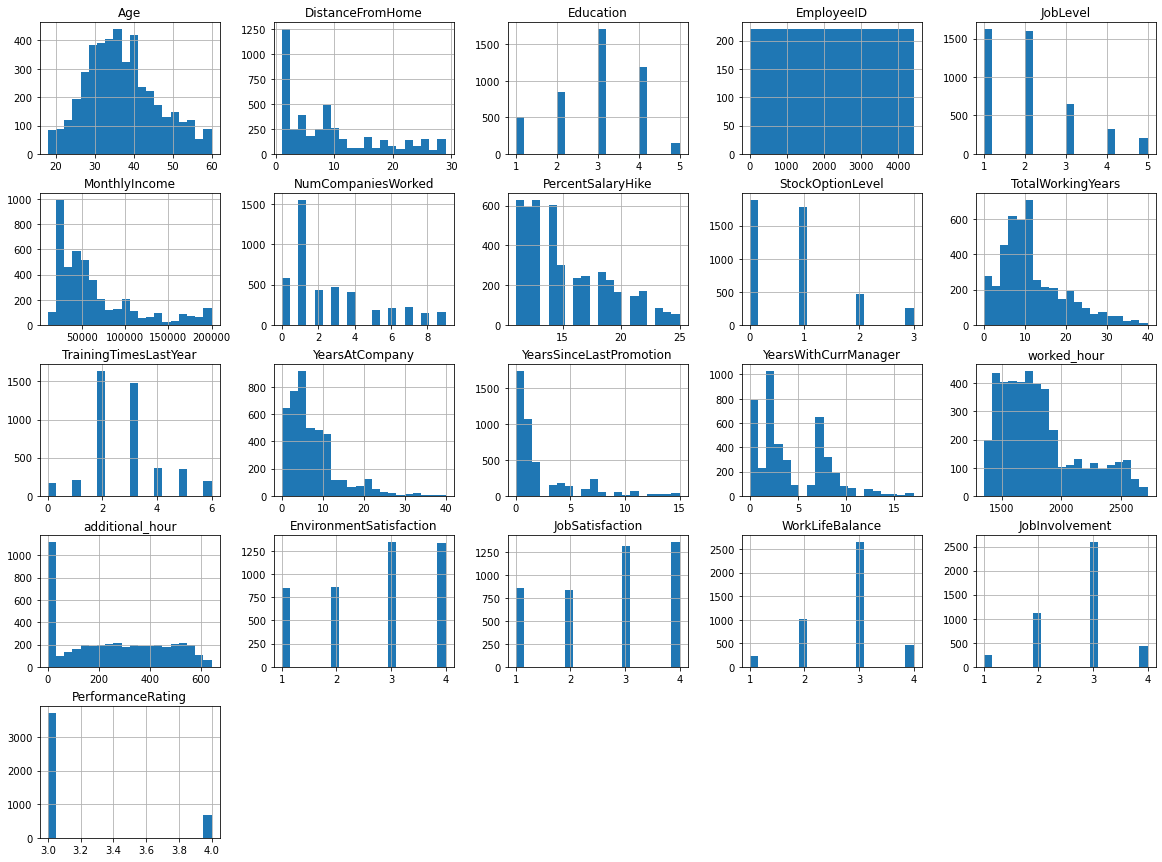

In [204]:
general_data.hist(bins=20, figsize=(20, 15))


In [205]:
ordinal_columns = [
    'Attrition',
    'Gender',
]
onehot_columns = [
    'Department',
    'EducationField',
    'JobRole',
    'MaritalStatus',
]

one_hot_cat = []

for col in onehot_columns:
    one_hot_cat.append(general_data[col].unique())


bussiness_travel_values = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
fill_only_col = [
    "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", 'NumCompaniesWorked']

numeric_cols = [
    'Age',
    'TotalWorkingYears',
    'worked_hour',
    'additional_hour',
    'DistanceFromHome',
    'MonthlyIncome',
    'PercentSalaryHike',
    'StockOptionLevel',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
]


In [206]:
one_hot_cat

[array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 array(['Healthcare Representative', 'Research Scientist',
        'Sales Executive', 'Human Resources', 'Research Director',
        'Laboratory Technician', 'Manufacturing Director',
        'Sales Representative', 'Manager'], dtype=object),
 array(['Married', 'Single', 'Divorced'], dtype=object)]

In [207]:
general_data['WorkLifeBalance'] = general_data['WorkLifeBalance'].astype(float)
general_data['EnvironmentSatisfaction'] = general_data['EnvironmentSatisfaction'].astype(
    float)
general_data['JobSatisfaction'] = general_data['JobSatisfaction'].astype(float)
general_data['NumCompaniesWorked'] = general_data['NumCompaniesWorked'].astype(
    float)
general_data['TotalWorkingYears'] = general_data['TotalWorkingYears'].astype(
    float)


In [208]:
numeric_pipline = Pipeline([
    ('fill_na_num', SimpleImputer(strategy='median')),
    ('standardisation', StandardScaler()),
])
col_transformer = ColumnTransformer([
    ('fill_na', SimpleImputer(strategy='median'), fill_only_col),
    ('numeric', numeric_pipline, numeric_cols),
    ("qualitative", OneHotEncoder(categories=one_hot_cat), onehot_columns),
    ('bool', OrdinalEncoder(dtype=int), ordinal_columns),
    ("BusinessTravel", OrdinalEncoder(categories=[
     bussiness_travel_values]), ['BusinessTravel'])
])


In [209]:
pre_general_data = col_transformer.fit_transform(general_data)


In [210]:
copy_general_data = general_data.copy()


In [211]:
start = 0

In [212]:
for col in fill_only_col:
    general_data[col] = pre_general_data[:, start]
    start+=1

In [213]:
for col in numeric_cols:
    general_data[col] = pre_general_data[:, start]
    start+=1


In [214]:

for col in onehot_columns:
    for v in general_data[col].unique():
        general_data[v] = pre_general_data[:, start]
        general_data[v] = general_data[v].astype(int)
        start += 1
    general_data = general_data.drop(col, axis=1)


In [215]:
for col in ordinal_columns:
    general_data[col] = pre_general_data[:, start]
    general_data[col] = general_data[col].astype(int)
    start += 1
    

In [216]:
general_data['BusinessTravel'] = pre_general_data[:, start]
general_data['BusinessTravel'] = general_data['BusinessTravel'].astype(int)


In [217]:
general_data.tail(5)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,worked_hour,additional_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Sales,Research & Development,Human Resources,Life Sciences,Other,Medical,Marketing,Technical Degree,Healthcare Representative,Research Scientist,Sales Executive,Research Director,Laboratory Technician,Manufacturing Director,Sales Representative,Manager,Married,Single,Divorced
4405,0.555852,0,1,-0.517332,4,4406,0,1,-0.100700,3.0,0.489376,0.241988,-0.164315,1.707500,-0.654454,-0.679146,-0.595227,0.753453,-1.247066,4.0,1.0,3.0,3,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4406,-0.867672,0,1,-0.887515,4,4407,1,1,-0.812504,2.0,-0.057267,-0.932014,-0.164315,-0.620189,-0.654454,-0.679146,-0.595227,-1.065043,1.357046,4.0,4.0,3.0,2,3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4407,-1.305679,0,1,1.950552,2,4408,1,2,-0.595138,0.0,1.309341,-0.932014,-0.807517,0.931603,-0.491174,-0.368715,-0.595227,-0.123880,-0.193839,1.0,3.0,3.0,3,4,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4408,0.555852,0,1,1.086793,2,4409,1,1,-0.872210,0.0,-0.330589,0.241988,-0.164315,-0.620189,0.325228,1.493867,1.086895,1.407803,-1.247066,4.0,1.0,3.0,2,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4409,0.336849,0,1,2.320735,3,4410,1,2,-0.219901,0.0,-0.877232,-0.932014,-0.164315,2.483396,2.284590,0.252146,1.367249,-0.603157,0.595933,1.0,3.0,3.0,4,3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [218]:
corr_matrix = general_data.corr()
corr_matrix.style.background_gradient(cmap='Wistia')


,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,worked_hour,additional_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Sales,Research & Development,Human Resources,Life Sciences,Other,Medical,Marketing,Technical Degree,Healthcare Representative,Research Scientist,Sales Executive,Research Director,Laboratory Technician,Manufacturing Director,Sales Representative,Manager,Married,Single,Divorced
Age,1.000000,-0.159205,-0.011807,0.006963,-0.035706,0.008649,-0.039352,-0.002884,-0.044314,0.298869,-0.033137,-0.031753,0.680340,-0.027308,0.311309,0.216513,0.202089,-0.000377,0.012520,0.009699,-0.003003,-0.020524,0.018196,-0.025563,-0.015558,0.018040,0.001194,-0.001790,-0.001543,0.009673,-0.032831,0.046655,-0.051511,0.005834,0.008219,-0.016059,0.033969,0.001261,-0.014096,0.009020,0.083919,-0.119185,0.033120
Attrition,-0.159205,1.000000,0.127006,-0.009730,-0.015111,-0.004729,0.018125,-0.010290,-0.031176,0.042064,0.032533,-0.006839,-0.170162,-0.049431,-0.134392,-0.033019,-0.156199,0.198890,-0.189422,-0.101625,-0.103068,-0.062975,-0.015588,0.023403,-0.019742,-0.015307,-0.013857,0.012394,-0.025958,0.000764,-0.003780,-0.040646,-0.013768,0.027460,0.010869,0.049760,0.001179,-0.045770,-0.011073,-0.017798,-0.090984,0.175419,-0.087716
BusinessTravel,-0.011807,0.127006,1.000000,0.014130,0.007567,-0.003737,-0.021404,0.013727,-0.055905,-0.030698,-0.025727,0.004770,0.008298,-0.043173,0.005212,0.005222,-0.000229,0.049254,-0.060034,-0.009892,0.008949,0.004914,0.025705,-0.019587,0.056932,-0.053821,0.003513,-0.039889,-0.000470,0.030025,0.054607,-0.028644,0.003062,0.008887,-0.022053,0.017409,-0.011332,0.036336,-0.028647,0.000945,0.002198,0.023017,-0.028444
DistanceFromHome,0.006963,-0.009730,0.014130,1.000000,-0.008638,-0.001097,-0.044173,-0.037329,-0.021607,-0.013514,0.038125,0.011169,0.009314,-0.009001,0.031684,0.002290,0.021584,0.009928,-0.014390,0.020113,-0.011213,0.008305,-0.001837,0.036418,0.003129,0.007409,0.001813,0.009607,-0.014552,-0.008728,0.005240,-0.010691,-0.016564,-0.002360,-0.012479,-0.003849,0.052249,0.000305,0.005463,-0.038859,0.038151,-0.042204,0.001624
Education,-0.035706,-0.015111,0.007567,-0.008638,1.000000,-0.009680,-0.016547,0.045746,0.006410,-0.016195,-0.040531,0.001261,-0.010813,0.010472,0.006080,0.022490,0.005358,0.001406,-0.006790,-0.045636,-0.004612,-0.005610,-0.018279,-0.035591,0.001207,-0.007431,0.045063,0.006435,0.046729,-0.020869,-0.008889,0.003472,-0.013044,0.000709,-0.004180,0.049694,-0.077518,-0.011976,0.032320,0.044142,-0.008534,0.024114,-0.016818
EmployeeID,0.008649,-0.004729,-0.003737,-0.001097,-0.009680,1.000000,-0.013165,-0.003303,0.007338,-0.000789,-0.004456,-0.014254,-0.000956,-0.010191,0.004086,0.000256,0.008579,-0.010239,0.004423,0.000455,-0.001024,-0.002164,0.008591,-0.006892,0.005417,-0.014299,-0.008991,-0.000302,0.003532,-0.002975,-0.004620,0.001983,0.002764,-0.004666,0.001284,-0.002202,-0.008073,0.013529,0.009162,-0.001464,0.000419,0.000823,-0.001424
Gender,-0.039352,0.018125,-0.021404,-0.044173,-0.016547,-0.013165,1.000000,-0.026854,0.007530,-0.067120,0.011841,0.019237,-0.027616,-0.030167,-0.017277,-0.021812,0.004438,0.003231,-0.003036,-0.023277,0.015923,-0.032373,0.025768,0.051586,0.007249,-0.010507,0.006014,0.006770,0.004840,-0.031072,0.002683,0.018457,-0.002924,0.030628,-0.005348,0.000000,0.013121,-0.004657,-0.010829,-0.044809,-0.035675,0.011910,0.029382
JobLevel,-0.002884,-0.010290,0.013727,-0.037329,0.045746,-0.003303,-0.026854,1.000000,0.047316,-0.010116,0.010973,0.000993,-0.036779,-0.032500,-0.064219,-0.060811,-0.055251,0.011067,0.009684,-0.024540,-0.018596,-0.027763,-0.012630,-0.002474,0.020701,-0.036763,0.028870,0.009053,-0.011367,-0.031310,0.035297,0.001202,0.007818,0.017455,-0.021969,0.032207,-0.031566,-0.004684,-0.024790,0.025348,0.007360,-0.021163,0

<AxesSubplot:>

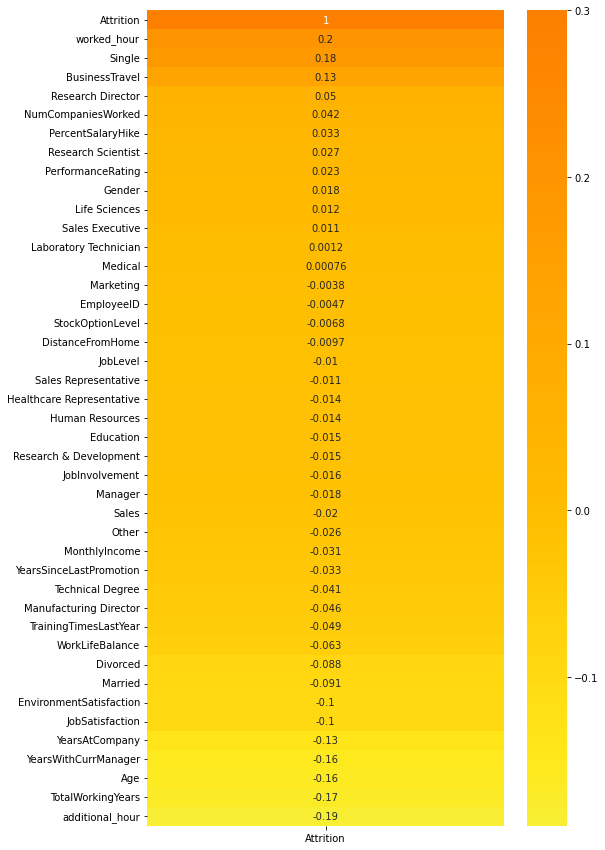

In [219]:
import seaborn as sn 
plt.figure(figsize=(8,15))
corr_matrix = corr_matrix.sort_values(by='Attrition', ascending=False)
sn.heatmap(corr_matrix[['Attrition']],annot=True,cmap='Wistia',center=0,vmax=0.3)

## Split

In [220]:
general_data = general_data.drop("EmployeeID",axis=1)

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(general_data, general_data["Attrition"]):
    strat_train_set = general_data.loc[train_index]
    strat_test_set = general_data.loc[test_index]


In [222]:
y_train = strat_train_set['Attrition']
x_train = strat_train_set.drop('Attrition',axis=1)

In [223]:
y_test = strat_test_set['Attrition']
x_test = strat_test_set.drop('Attrition',axis=1)

In [49]:
x_train.isna().sum()

Age                          0
BusinessTravel               0
DistanceFromHome             0
Education                    0
Gender                       0
JobLevel                     0
MonthlyIncome                0
NumCompaniesWorked           0
PercentSalaryHike            0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
YearsAtCompany               0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
worked_hour                  0
additional_hour              0
EnvironmentSatisfaction      0
JobSatisfaction              0
WorkLifeBalance              0
JobInvolvement               0
PerformanceRating            0
Sales                        0
Research & Development       0
Human Resources              0
Life Sciences                0
Other                        0
Medical                      0
Marketing                    0
Technical Degree             0
Healthcare Representative    0
Research Scientist           0
Sales Ex

## Stochastic Gradient chkoupi 

precision : 35%
recall : 35%
F1 : 35%
Accuracy : 79%


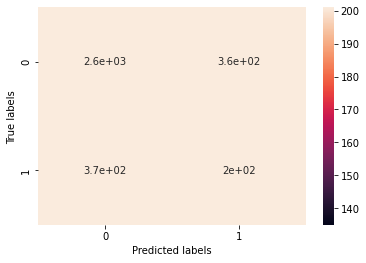

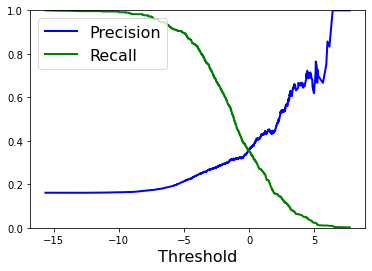

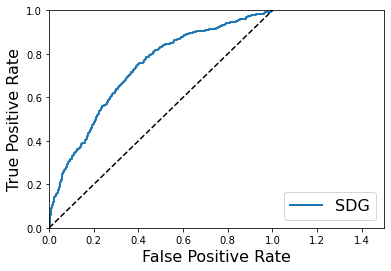

In [50]:
sgd_clf = SGDClassifier(max_iter=500, random_state=42)
sgd_clf.fit(x_train, y_train)
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=5)
print("precision : " + str(precision_score(y_train, y_train_pred))[2:4] + "%")
print("recall : " + str(recall_score(y_train, y_train_pred))[2:4] + "%")
print('F1 : ' + str(f1_score(y_train, y_train_pred))[2:4] + "%")
print('Accuracy : ' + str(accuracy_score(y_train, y_train_pred))[2:4] + "%")
cm = sn.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, vmax=150, fmt=".0f")
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')
y_scores_sgd = cross_val_predict(
    sgd_clf, x_train, y_train, cv=5, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_sgd)
fig, ax = plt.subplots()
ax.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
ax.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
ax.set_xlabel("Threshold", fontsize=16)
ax.legend(loc="upper left", fontsize=16)
ax.set_ylim([0, 1])
plt.show()
fpr_sdg,tpr_sdg, thresholds = roc_curve(y_train, y_scores_sgd)
plot_roc_curve(fpr_sdg, tpr_sdg, "SDG")


precision : 65.79 %
recall : 17.61 %
F1 : 27.78 %
Accuracy : 85.26 %


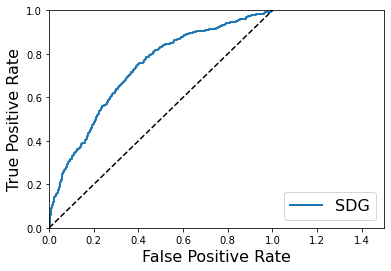

In [51]:
y_test_pred_sgd = sgd_clf.predict(x_test)
y_test_scores_sgd = sgd_clf
# y_test_pred_sgd = y_test_pred_sgd > best_threshold_sgd
print("precision : " +
      "{:.2f}".format(precision_score(y_test, y_test_pred_sgd)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_test, y_test_pred_sgd)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_test, y_test_pred_sgd)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_test, y_test_pred_sgd)*100), "%")
fpr_sgd,tpr_sgd, thresholds = roc_curve(y_train, y_scores_sgd)
plot_roc_curve(fpr_sgd, tpr_sgd, "SDG")


In [52]:
param_grid_sgd = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [200,300,400,500],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
}

grid_search_sgd = GridSearchCV(sgd_clf, param_grid_sgd, cv=7,
                                  scoring='accuracy', return_train_score=True)
grid_search_sgd.fit(x_train, y_train)


GridSearchCV(cv=7, estimator=SGDClassifier(max_iter=500, random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'max_iter': [200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                 1000.0]},
             return_train_score=True, scoring='accuracy')

SGDClassifier(alpha=0.01, loss='log', max_iter=200, penalty='elasticnet',
              random_state=42)
precision : 76.22 %
recall : 19.16 %
F1 : 30.62 %
Accuracy : 86.00 %


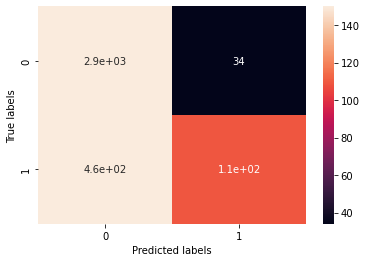

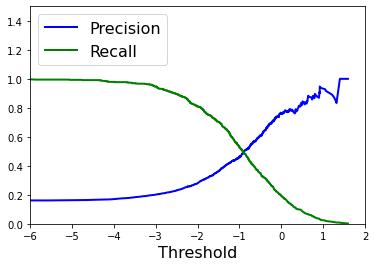

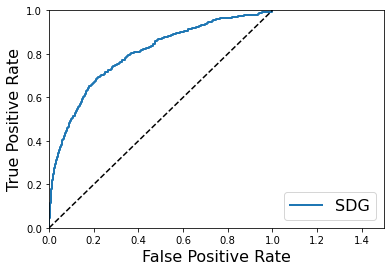

In [53]:
sgd_clf = grid_search_sgd.best_estimator_
print(sgd_clf)
y_pred_sgd = cross_val_predict(sgd_clf, x_train, y_train, cv=5)
print("precision : " +
      "{:.2f}".format(precision_score(y_train, y_pred_sgd)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_train, y_pred_sgd)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_train, y_pred_sgd)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_train, y_pred_sgd)*100), "%")

cm = sn.heatmap(confusion_matrix(y_train, y_pred_sgd), annot=True, vmax=150 , fmt=".0f")
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')
y_scores_sgd = cross_val_predict(sgd_clf, x_train, y_train, cv=5,method='decision_function')

precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(
    y_train, y_scores_sgd)
fig, ax = plt.subplots()
ax.plot(thresholds_sgd, precisions_sgd[:-1],
        "b-", label="Precision", linewidth=2)
ax.plot(thresholds_sgd,
        recalls_sgd[:-1], "g-", label="Recall", linewidth=2)
ax.set_xlabel("Threshold", fontsize=16)
ax.legend(loc="upper left", fontsize=16)
ax.set_ylim([0, 1.5])
ax.set_xlim([-6, 2])
plt.show()
fpr_sgd,tpr_sgd, thresholds = roc_curve(y_train, y_scores_sgd)
plot_roc_curve(fpr_sgd,tpr_sgd, "SDG")


precision : 100.00 %
recall : 0.70 %
F1 : 1.40 %
Accuracy : 84.01 %


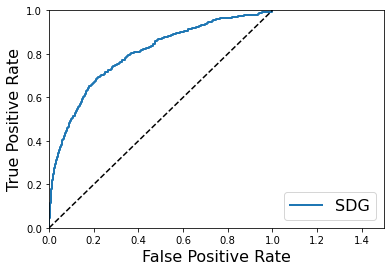

In [54]:
y_test_pred_sgd = sgd_clf.predict(x_test)
y_test_scores_sgd = sgd_clf.decision_function(x_test)
y_test_pred_sgd = y_test_scores_sgd > 1.18
print("precision : " +
      "{:.2f}".format(precision_score(y_test, y_test_pred_sgd)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_test, y_test_pred_sgd)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_test, y_test_pred_sgd)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_test, y_test_pred_sgd)*100), "%")
fpr_sgd,tpr_sgd, thresholds = roc_curve(y_train, y_scores_sgd)
plot_roc_curve(fpr_sgd,tpr_sgd, "SDG")



## Random Forest

precision : 98.76 %
recall : 83.83 %
F1 : 90.68 %
Accuracy : 97.22 %


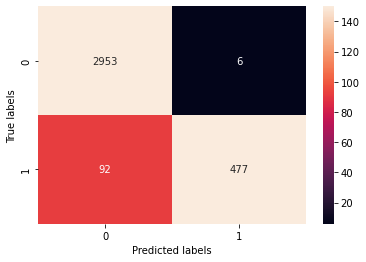

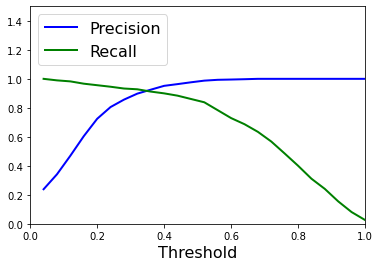

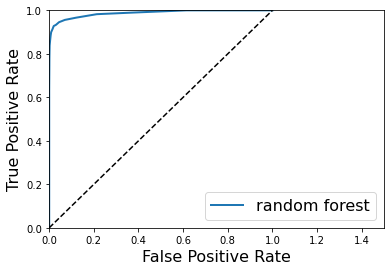

In [289]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=25, random_state=42)
forest_clf.fit(x_train,y_train)
y_pred_forest = cross_val_predict(forest_clf, x_train, y_train, cv=5)
print("precision : " + "{:.2f}".format(precision_score(y_train, y_pred_forest)*100) , "%")
print("recall : " + "{:.2f}".format(recall_score(y_train, y_pred_forest)*100) , "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_train, y_pred_forest)*100) , "%")
print('Accuracy : ' + "{:.2f}".format(accuracy_score(y_train, y_pred_forest)*100) , "%")

cm = sn.heatmap(confusion_matrix(y_train, y_pred_forest),
                annot=True, vmax=150, fmt=".0f")
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')


y_scores_forest = cross_val_predict(
    forest_clf, x_train, y_train.tolist(), cv=5, method="predict_proba")

y_scores_forest = y_scores_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train, y_scores_forest)
fig, ax = plt.subplots()

ax.plot(thresholds_forest, precisions_forest[:-1],
         "b-", label="Precision", linewidth=2)
ax.plot(thresholds_forest,
         recalls_forest[:-1], "g-", label="Recall", linewidth=2)
ax.set_xlabel("Threshold", fontsize=16)
ax.legend(loc="upper left", fontsize=16)
ax.set_ylim([0, 1.5])
ax.set_xlim([0, 1])
plt.show()
tpr_forest, fpr_forest, thresholds = roc_curve(y_train, y_scores_forest)
plot_roc_curve(tpr_forest, fpr_forest, "random forest")


In [290]:
param_grid_forest = {
    'n_estimators': [100, 300,350,400],
    'max_depth': [5, 10, 15, 20, 30, 40, 50, 70]
}

grid_search_forest = GridSearchCV(forest_clf, param_grid_forest, cv=5,
                               scoring='accuracy', return_train_score=True)
grid_search_forest.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=25, random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 30, 40, 50, 70],
                         'n_estimators': [100, 300, 350, 400]},
             return_train_score=True, scoring='accuracy')

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)
precision : 98.98 %
recall : 85.41 %
F1 : 91.70 %
Accuracy : 97.51 %


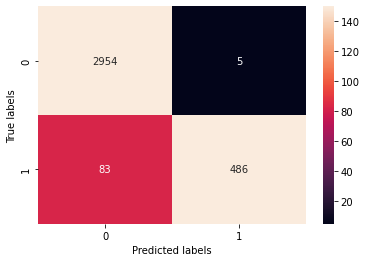

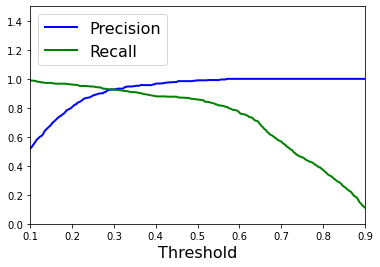

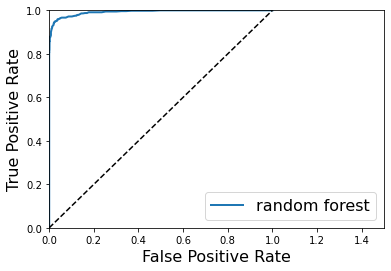

In [291]:
forest_clf = grid_search_forest.best_estimator_
print(forest_clf)
y_pred_forest = cross_val_predict(forest_clf, x_train, y_train, cv=5)
print("precision : " + "{:.2f}".format(precision_score(y_train, y_pred_forest)*100), "%")
print("recall : " + "{:.2f}".format(recall_score(y_train, y_pred_forest)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_train, y_pred_forest)*100), "%")
print('Accuracy : ' + "{:.2f}".format(accuracy_score(y_train, y_pred_forest)*100), "%")

cm = sn.heatmap(confusion_matrix(y_train, y_pred_forest),
                annot=True, vmax=150, fmt=".0f")
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')

y_scores_forest = cross_val_predict(
    forest_clf, x_train, y_train.tolist(), cv=5, method="predict_proba")

y_scores_forest = y_scores_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train, y_scores_forest)

fig, ax = plt.subplots()
ax.plot(thresholds_forest, precisions_forest[:-1],
         "b-", label="Precision", linewidth=2)
ax.plot(thresholds_forest,
         recalls_forest[:-1], "g-", label="Recall", linewidth=2)
ax.set_xlabel("Threshold", fontsize=16)
ax.legend(loc="upper left", fontsize=16)
ax.set_ylim([0, 1.5])
ax.set_xlim([0.1, 0.9])
plt.show()
fpr_forest,tpr_forest, thresholds = roc_curve(y_train, y_scores_forest)
plot_roc_curve(fpr_forest,tpr_forest, "random forest")


precision : 0.00 %
recall : 0.00 %
F1 : 0.00 %
Accuracy : 83.90 %


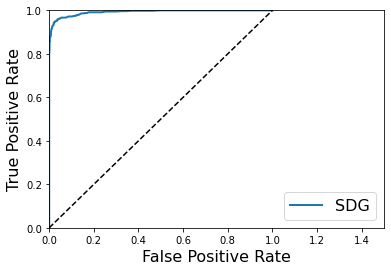

In [292]:
y_test_pred_forest = forest_clf.predict(x_test)
y_test_scores_forest = forest_clf.predict_proba(x_test)
y_test_pred_forest = y_test_scores_forest[:,-1] > 0.9
print("precision : " +
      "{:.2f}".format(precision_score(y_test, y_test_pred_forest)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_test, y_test_pred_forest)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_test, y_test_pred_forest)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_test, y_test_pred_forest)*100), "%")
fpr_forest,tpr_forest, thresholds = roc_curve(y_train, y_scores_forest)
plot_roc_curve(fpr_forest,tpr_forest, "SDG")

## Logistic Regression

precision : 66%
recall : 27%
F1 : 38%
Accuracy : 86%


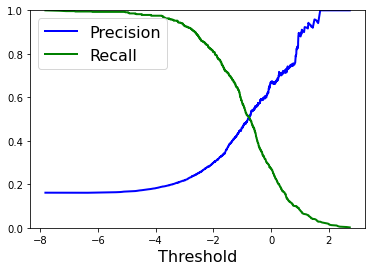

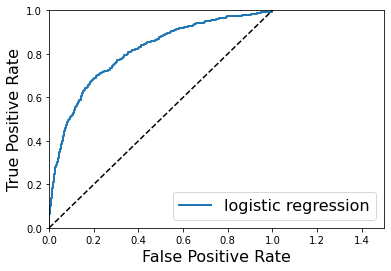

In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000,random_state=42)
y_pred_logreg = cross_val_predict(logreg,x_train,y_train,cv=5)
print("precision : " + str(precision_score(y_train, y_pred_logreg))[2:4] + "%")
print("recall : " + str(recall_score(y_train, y_pred_logreg))[2:4] + "%")
print('F1 : ' + str(f1_score(y_train, y_pred_logreg))[2:4] + "%")
print('Accuracy : ' + str(accuracy_score(y_train, y_pred_logreg))[2:4] + "%")
y_scores_logreg = cross_val_predict(
    logreg, x_train, y_train, cv=5, method="decision_function")
precisions_logreg, recalls_logreg, thresholds_logreg = precision_recall_curve(
    y_train, y_scores_logreg)

plt.plot(thresholds_logreg, precisions_logreg[:-1],
         "b-", label="Precision", linewidth=2)
plt.plot(thresholds_logreg,
         recalls_logreg[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.ylim([0, 1])
plt.show()
fpr_logreg,tpr_logreg, thresholds = roc_curve(y_train, y_scores_logreg)
plot_roc_curve(fpr_logreg,tpr_logreg, "logistic regression")

In [60]:
param_grid_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.01,0.001],
    'max_iter':[100,150,200,500]
}
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5,scoring='accuracy', return_train_score=True)
grid_search_logreg.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 0.01, 0.001],
                         'max_iter': [100, 150, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='accuracy')

LogisticRegression(C=0.1, random_state=42)
precision : 67.16 %
recall : 24.08 %
F1 : 35.45 %
Accuracy : 85.86 %


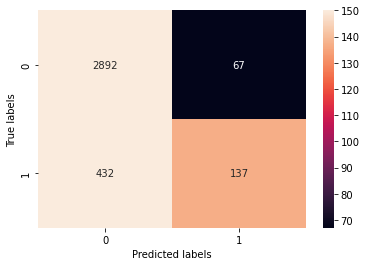

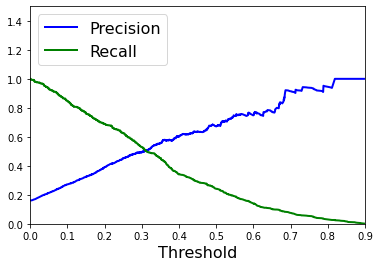

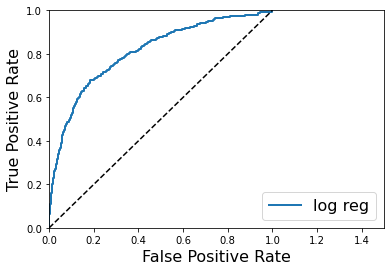

In [85]:
logreg = grid_search_logreg.best_estimator_
print(logreg)
y_pred_logreg = cross_val_predict(logreg, x_train, y_train, cv=5)
print("precision : " +
      "{:.2f}".format(precision_score(y_train, y_pred_logreg)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_train, y_pred_logreg)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_train, y_pred_logreg)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_train, y_pred_logreg)*100), "%")

cm = sn.heatmap(confusion_matrix(y_train, y_pred_logreg),
                annot=True, vmax=150, fmt=".0f")
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')


y_scores_logreg = cross_val_predict(
    logreg, x_train, y_train.tolist(), cv=5, method="predict_proba")

y_scores_logreg = y_scores_logreg[:, 1]
precisions_logreg, recalls_logreg, thresholds_logreg = precision_recall_curve(
    y_train, y_scores_logreg)

fig, ax = plt.subplots()
ax.plot(thresholds_logreg, precisions_logreg[:-1],
        "b-", label="Precision", linewidth=2)
ax.plot(thresholds_logreg,
        recalls_logreg[:-1], "g-", label="Recall", linewidth=2)
ax.set_xlabel("Threshold", fontsize=16)
ax.legend(loc="upper left", fontsize=16)
ax.set_ylim([0, 1.5])
ax.set_xlim([0, 0.9])
plt.show()
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_train, y_scores_logreg)
plot_roc_curve(fpr_logreg, tpr_logreg, "log reg")


precision : 63.46 %
recall : 23.24 %
F1 : 34.02 %
Accuracy : 85.49 %


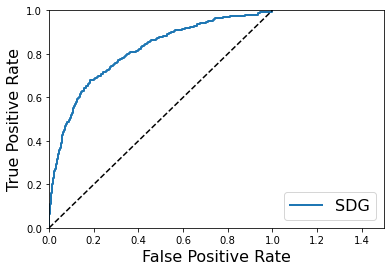

In [81]:
y_test_pred_logreg = logreg.predict(x_test)
y_test_scores_logreg = logreg.predict_proba(x_test)
# y_test_pred_logreg = y_test_scores_logreg[:,-1] > 0.8
print("precision : " +
      "{:.2f}".format(precision_score(y_test, y_test_pred_logreg)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_test, y_test_pred_logreg)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_test, y_test_pred_logreg)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_test, y_test_pred_logreg)*100), "%")
fpr_logreg,tpr_logreg, thresholds = roc_curve(y_train, y_scores_logreg)
plot_roc_curve(fpr_logreg,tpr_logreg, "SDG")

## Decision Tree

Precision : 84.27 %
Recall : 86.64 %
F1 : 85.44 %
Accuracy : 95.24 %


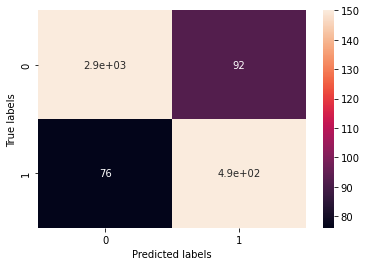

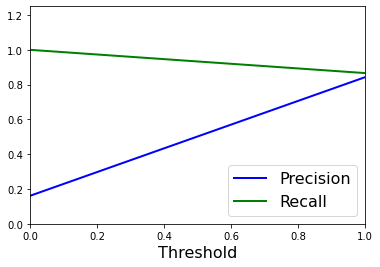

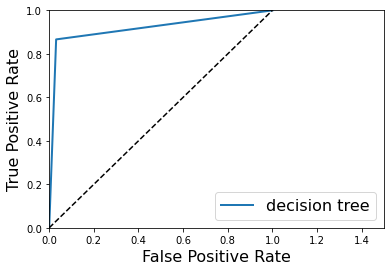

In [86]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42, max_features=40, criterion="gini")
dtc.fit(x_train,y_train)
y_pred_dtc = cross_val_predict(dtc,x_train,y_train,cv=5)
print("Precision : " + "{:.2f}".format(precision_score(y_train, y_pred_dtc)*100), "%")
print("Recall : " + "{:.2f}".format(recall_score(y_train, y_pred_dtc)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_train, y_pred_dtc)*100), "%")
print('Accuracy : ' + "{:.2f}".format(accuracy_score(y_train, y_pred_dtc)*100), "%")

cm = sn.heatmap(confusion_matrix(y_train, y_pred_dtc), annot=True, vmax=150 , fmt=".0f")
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')
y_scores_dtc = cross_val_predict(
    dtc, x_train, y_train, cv=5, method="predict_proba")
y_scores_dtc = y_scores_dtc[:, 1]
precisions_dtc, recalls_dtc, thresholds_dtc = precision_recall_curve(
    y_train, y_scores_dtc)
fig, ax = plt.subplots()
ax.plot(thresholds_dtc, precisions_dtc[:-1],
         "b-", label="Precision", linewidth=2)
ax.plot(thresholds_dtc,
         recalls_dtc[:-1], "g-", label="Recall", linewidth=2)
ax.set_xlabel("Threshold", fontsize=16)
ax.legend(loc="lower right", fontsize=16)
ax.set_ylim([0, 1.25])
ax.set_xlim([0, 1])
plt.show()
fpr_dtc,tpr_dtc, thresholds = roc_curve(y_train, y_scores_dtc)
plot_roc_curve(fpr_dtc,tpr_dtc, "decision tree")

In [64]:
param_grid_dtc = {
    'max_depth': [4, 5, 7,10],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 4,5],
    'max_features': list(range(5, 40))
}

grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5,
                               scoring='accuracy', return_train_score=True)
grid_search_dtc.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_features=40, random_state=42),
             param_grid={'max_depth': [4, 5, 7, 10],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20, 21, 22, 23, 24,
                                          25, 26, 27, 28, 29, 30, 31, 32, 33,
                                          34, ...],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [1, 2, 5, 10]},
             return_train_score=True, scoring='accuracy')

DecisionTreeClassifier(max_depth=10, max_features=19, random_state=42)
precision : 81.89 %
recall : 73.11 %
F1 : 77.25 %
Accuracy : 93.06 %


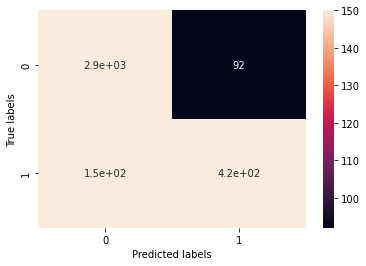

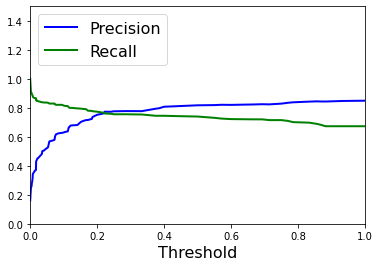

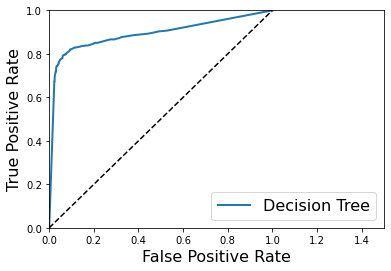

In [65]:
dtc = grid_search_dtc.best_estimator_
print(dtc)
y_pred_dtc = cross_val_predict(dtc, x_train, y_train, cv=5)
print("precision : " +
      "{:.2f}".format(precision_score(y_train, y_pred_dtc)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_train, y_pred_dtc)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_train, y_pred_dtc)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_train, y_pred_dtc)*100), "%")

cm = sn.heatmap(confusion_matrix(y_train, y_pred_dtc), annot=True, vmax=150 , fmt=".0f")
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')

y_scores_dtc = cross_val_predict(
    dtc, x_train, y_train.tolist(), cv=5, method="predict_proba")

y_scores_dtc = y_scores_dtc[:, 1]
precisions_dtc, recalls_dtc, thresholds_dtc = precision_recall_curve(
    y_train, y_scores_dtc)

fig, ax = plt.subplots()
ax.plot(thresholds_dtc, precisions_dtc[:-1],
        "b-", label="Precision", linewidth=2)
ax.plot(thresholds_dtc,
        recalls_dtc[:-1], "g-", label="Recall", linewidth=2)
ax.set_xlabel("Threshold", fontsize=16)
ax.legend(loc="upper left", fontsize=16)
ax.set_ylim([0, 1.5])
ax.set_xlim([0, 1])
plt.show()
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_train, y_scores_dtc)
plot_roc_curve(fpr_dtc, tpr_dtc, "Decision Tree")


precision : 97.06 %
recall : 69.72 %
F1 : 81.15 %
Accuracy : 94.78 %


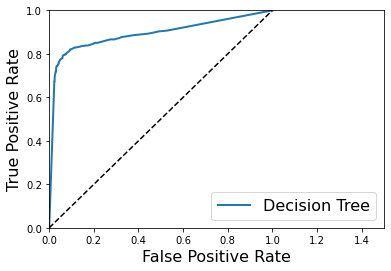

In [66]:
y_test_pred_dtc = dtc.predict(x_test)
y_test_scores_dtc = dtc.predict_proba(x_test)
y_test_pred_dtc = y_test_scores_dtc[:,-1] > 0.9

print("precision : " +
      "{:.2f}".format(precision_score(y_test, y_test_pred_dtc)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_test, y_test_pred_dtc)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_test, y_test_pred_dtc)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_test, y_test_pred_dtc)*100), "%")
fpr_dtc,tpr_dtc, thresholds = roc_curve(y_train, y_scores_dtc)
plot_roc_curve(fpr_dtc,tpr_dtc, "Decision Tree")

## SVC

Precision : 93.81 %
Recall : 15.99 %
F1 : 27.33 %
Accuracy : 86.28 %


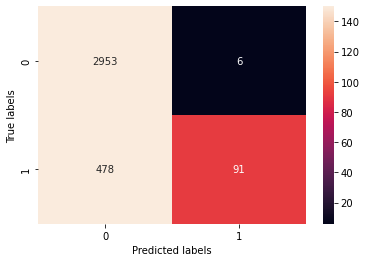

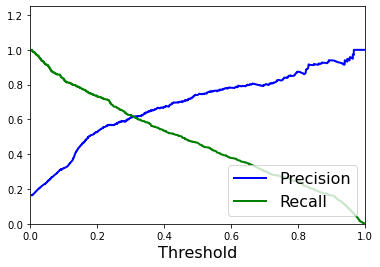

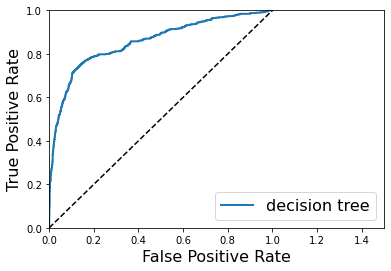

In [224]:
from sklearn.svm import SVC

svc = SVC(random_state=42, C=1 ,probability=True)
svc.fit(x_train,y_train)
y_pred_svc = cross_val_predict(svc,x_train,y_train,cv=5)
print("Precision : " + "{:.2f}".format(precision_score(y_train, y_pred_svc)*100), "%")
print("Recall : " + "{:.2f}".format(recall_score(y_train, y_pred_svc)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_train, y_pred_svc)*100), "%")
print('Accuracy : ' + "{:.2f}".format(accuracy_score(y_train, y_pred_svc)*100), "%")

cm = sn.heatmap(confusion_matrix(y_train, y_pred_svc),
                annot=True, vmax=150, fmt=".0f")
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')
y_scores_svc = cross_val_predict(
    svc, x_train, y_train, cv=5, method="predict_proba")
y_scores_svc = y_scores_svc[:, 1]
precisions_svc, recalls_svc, thresholds_svc = precision_recall_curve(
    y_train, y_scores_svc)
fig, ax = plt.subplots()
ax.plot(thresholds_svc, precisions_svc[:-1],
         "b-", label="Precision", linewidth=2)
ax.plot(thresholds_svc,
         recalls_svc[:-1], "g-", label="Recall", linewidth=2)
ax.set_xlabel("Threshold", fontsize=16)
ax.legend(loc="lower right", fontsize=16)
ax.set_ylim([0, 1.25])
ax.set_xlim([0, 1])
plt.show()
fpr_svc,tpr_svc, thresholds = roc_curve(y_train, y_scores_svc)
plot_roc_curve(fpr_svc,tpr_svc, "decision tree")

In [225]:
param_grid_svc = {
        'C': [0.01,0.1, 1, 10,100,150],
}

grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5,
                               scoring='accuracy', return_train_score=True)
grid_search_svc.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(C=1, probability=True, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 150]},
             return_train_score=True, scoring='accuracy')

SVC(C=150, probability=True, random_state=42)
precision : 93.00 %
recall : 91.04 %
F1 : 92.01 %
Accuracy : 97.45 %


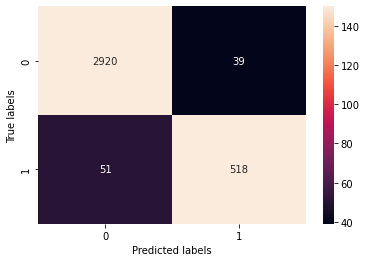

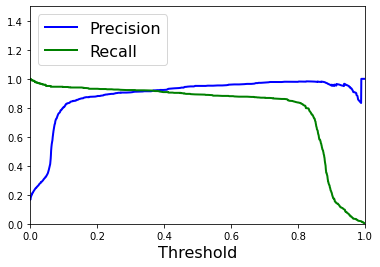

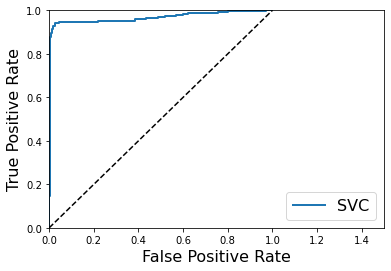

In [226]:
svc = grid_search_svc.best_estimator_
print(svc)
y_pred_svc = cross_val_predict(svc, x_train, y_train, cv=5)
print("precision : " +
      "{:.2f}".format(precision_score(y_train, y_pred_svc)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_train, y_pred_svc)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_train, y_pred_svc)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_train, y_pred_svc)*100), "%")

cm = sn.heatmap(confusion_matrix(y_train, y_pred_svc),
                annot=True, vmax=150, fmt=".0f")
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')

y_scores_svc = cross_val_predict(
    svc, x_train, y_train.tolist(), cv=5, method="predict_proba")

y_scores_svc = y_scores_svc[:, 1]
precisions_svc, recalls_svc, thresholds_svc = precision_recall_curve(
    y_train, y_scores_svc)

fig, ax = plt.subplots()
ax.plot(thresholds_svc, precisions_svc[:-1],
        "b-", label="Precision", linewidth=2)
ax.plot(thresholds_svc,
        recalls_svc[:-1], "g-", label="Recall", linewidth=2)
ax.set_xlabel("Threshold", fontsize=16)
ax.legend(loc="upper left", fontsize=16)
ax.set_ylim([0, 1.5])
ax.set_xlim([0, 1])
plt.show()
fpr_svc, tpr_svc, thresholds = roc_curve(y_train, y_scores_svc)
plot_roc_curve(fpr_svc, tpr_svc, "SVC")


In [227]:
best_threshold_svc = 0.5

precision : 97.89 %
recall : 97.89 %
F1 : 97.89 %
Accuracy : 99.32 %


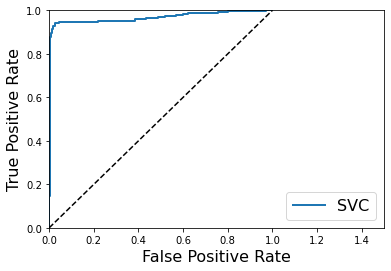

In [228]:
y_test_pred_svc = svc.predict(x_test)
y_test_scores_svc = svc.predict_proba(x_test)
y_test_pred_svc = y_test_scores_svc[:, -1] > best_threshold_svc

print("precision : " +
      "{:.2f}".format(precision_score(y_test, y_test_pred_svc)*100), "%")
print("recall : " +
      "{:.2f}".format(recall_score(y_test, y_test_pred_svc)*100), "%")
print('F1 : ' + "{:.2f}".format(f1_score(y_test, y_test_pred_svc)*100), "%")
print('Accuracy : ' +
      "{:.2f}".format(accuracy_score(y_test, y_test_pred_svc)*100), "%")
fpr_svc,tpr_svc, thresholds = roc_curve(y_train, y_scores_svc)
plot_roc_curve(fpr_svc,tpr_svc, "SVC")

## Comparer les modeles

<Figure size 3600x3600 with 0 Axes>

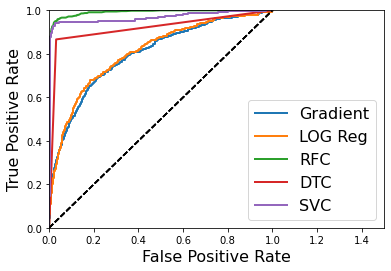

<Figure size 3600x3600 with 0 Axes>

In [229]:
plot_roc_curve(fpr_sgd,tpr_sgd, "Gradient")
plot_roc_curve(fpr_logreg,tpr_logreg, "LOG Reg")
plot_roc_curve(fpr_forest,tpr_forest, "RFC")
plot_roc_curve(fpr_dtc,tpr_dtc, "DTC")
plot_roc_curve(fpr_svc,tpr_svc, "SVC")
plt.figure(figsize=(50,50))

In [230]:
model_names = ['SGD','forest', 'LOG Reg', 'DTC','SVC']


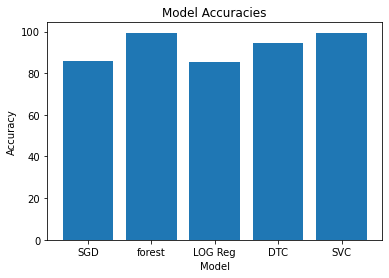

In [231]:
# graph accuracy bar
# 


accuracies = [
    85.83,
    99.43,
    85.49,
    94.56,
    99.09
]
plt.bar(model_names, accuracies)

# Set the title and axis labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

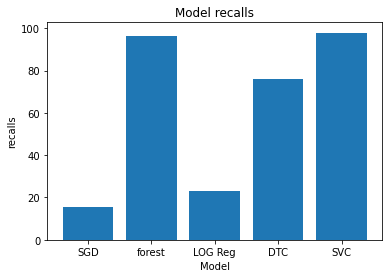

In [232]:
# graph recall bar

recalls = [
    15.49,
    96.48,
    23.24,
    76.06,
    97.89
]
plt.bar(model_names, recalls)

# Set the title and axis labels
plt.title('Model recalls')
plt.xlabel('Model')
plt.ylabel('recalls')

# Display the plot
plt.show()


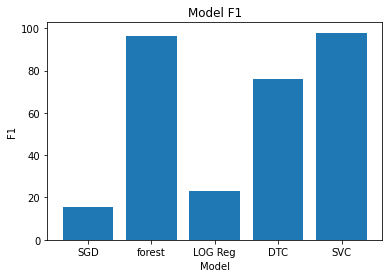

In [233]:
# graph F1  bar
f1s = [
    26.04,
    98.21,
    34.02,
    81.82,
    97.20
]
plt.bar(model_names, recalls)

# Set the title and axis labels
plt.title('Model F1')
plt.xlabel('Model')
plt.ylabel('F1')

# Display the plot
plt.show()


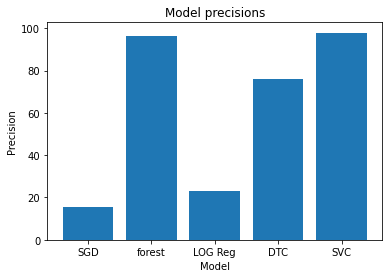

In [234]:
# graph precision bar
precisions = [
    81.48,
    100,
    63.46,
    88.52,
    96.53,
]

plt.bar(model_names, recalls)

# Set the title and axis labels
plt.title('Model precisions')
plt.xlabel('Model')
plt.ylabel('Precision')

# Display the plot
plt.show()


## determiner les parametres les plus influent

In [235]:
support_vectors = svc.support_vectors_


In [236]:
imp = pd.DataFrame()

imp['name'] = forest_clf.feature_names_in_
imp['importance'] = forest_clf.feature_importances_

<AxesSubplot:ylabel='name'>

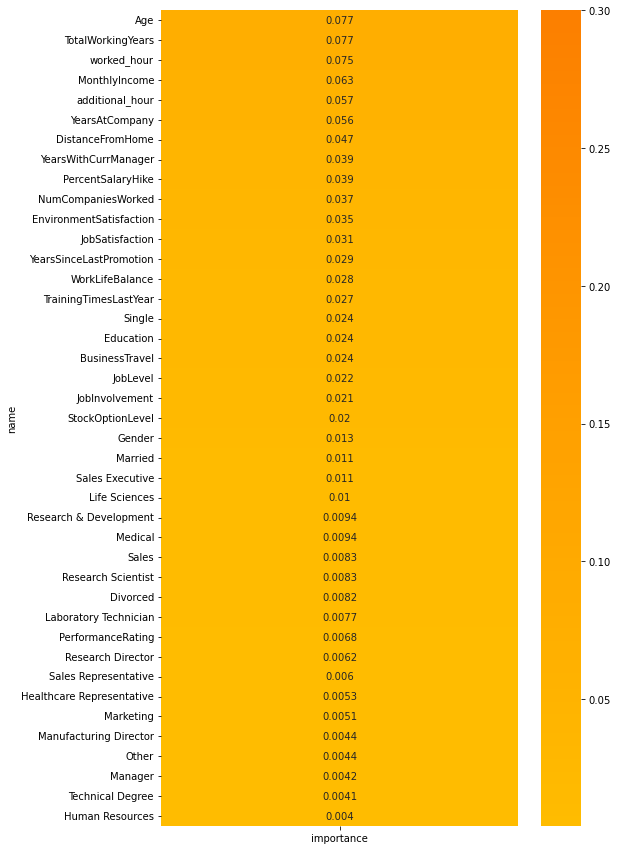

In [237]:
imp = imp.sort_values(by='importance', ascending=False)
imp = imp.set_index('name')
plt.figure(figsize=(8, 15))
sn.heatmap(imp,annot=True,cmap='Wistia',center=0,vmax=0.3)

## Appliquer des modifications au dataset de base

avant:  16.10 %
apres:  9.75 %


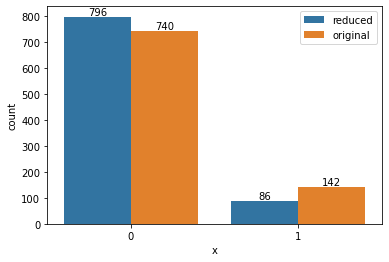

In [288]:
x_test_age_reduced = x_test
x_test_age_reduced['MonthlyIncome'] = x_test['MonthlyIncome']*1.2
x_test_age_reduced['TotalWorkingYears'] = x_test['TotalWorkingYears']*0.9
x_test_age_reduced['worked_hour'] = x_test['worked_hour']*0.8
x_test_age_reduced['additional_hour'] = x_test['worked_hour']*0.8
y_test_age_reduced = svc.predict(x_test_age_reduced)

df = pd.DataFrame()
df['x'] = np.concatenate((y_test_age_reduced, y_test))
df['hue'] = np.concatenate(
    (np.full(len(y_test_age_reduced), 'reduced'), np.full(len(y_test), 'original')))
ax = sn.countplot(data=df, x='x', hue='hue')
for container in ax.containers:
    ax.bar_label(container)
# Add a legend to the plot
plt.legend()
print("avant: ","{:.2f}".format(np.count_nonzero(y_test)*100/len(y_test)),"%")
print("apres: ","{:.2f}".format(np.count_nonzero(y_test_age_reduced)*100/len(y_test_age_reduced)),"%")
